In [34]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
#Create a Portfolio
df = pd.read_csv('/Users/omid/tmp/stockMarketPrediction_DL/tse_en.csv')
df.head()

,Date,Symbol,Name,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded
0,2008-12-06,بموتوح,ح . موتوژن‌,605,619,619,619,14,619.0,619.0,1,500,309500
1,2008-12-06,كاما,باما,2580,2657,2657,2605,25,2656.0,2657.0,14,21000,55793000
2,2008-12-06,شتوليح,ح . تولي‌پرس‌,1486,1500,1500,1500,14,1500.0,1500.0,1,733,1099500
3,2008-12-06,ثشاهد,سرمايه‌ گذاري‌ شاهد,2891,2977,2977,2910,19,2977.0,2977.0,34,130347,388043019
4,2008-12-06,لسرما,سرما آفرين‌,1698,1748,1748,1706,8,1748.0,1748.0,2,9514,16630472


In [36]:
khodro = df[df.Symbol == "خودرو"].dropna()
ring = df[df.Symbol == "خرينگ"].dropna()
bahman = df[df.Symbol == "خبهمن"].dropna()
mohareke = df[df.Symbol == "خمحركه"].dropna()

In [37]:
khodro.index = pd.to_datetime(khodro['Date'])
ring.index = pd.to_datetime(ring['Date'])
bahman.index = pd.to_datetime(bahman['Date'])
mohareke.index = pd.to_datetime(mohareke['Date'])

In [38]:
khodro.drop(columns="Date", inplace=True)
ring.drop(columns="Date", inplace=True)
bahman.drop(columns="Date", inplace=True)
mohareke.drop(columns="Date", inplace=True)

In [39]:
khodro.head()

,Symbol,Name,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded
Date,,,,,,,,,,,,
2008-12-06,خودرو,ايران‌ خودرو,1307,1308,1308,1278,-29,1270.0,1309.0,30,2222994,2831686027
2008-12-07,خودرو,ايران‌ خودرو,1278,1311,1311,1283,5,1311.0,1312.0,62,362811,475665221
2008-12-08,خودرو,ايران‌ خودرو,1283,1310,1310,1287,4,1310.0,1311.0,77,417677,547160357
2008-12-10,خودرو,ايران‌ خودرو,1287,1311,1311,1291,4,1311.0,1312.0,69,467419,612792375
2008-12-13,خودرو,ايران‌ خودرو,1291,1310,1310,1295,4,1310.0,1311.0,83,511302,669806563


In [40]:
#Normalize Prices

In [41]:
for stock_df in (khodro, ring, bahman, mohareke):
    stock_df['Normed Return'] = stock_df['Close']/stock_df.iloc[0]['Close']

In [42]:
khodro.head()

,Symbol,Name,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded,Normed Return
Date,,,,,,,,,,,,,
2008-12-06,خودرو,ايران‌ خودرو,1307,1308,1308,1278,-29,1270.0,1309.0,30,2222994,2831686027,1.000000
2008-12-07,خودرو,ايران‌ خودرو,1278,1311,1311,1283,5,1311.0,1312.0,62,362811,475665221,1.003912
2008-12-08,خودرو,ايران‌ خودرو,1283,1310,1310,1287,4,1310.0,1311.0,77,417677,547160357,1.007042
2008-12-10,خودرو,ايران‌ خودرو,1287,1311,1311,1291,4,1311.0,1312.0,69,467419,612792375,1.010172
2008-12-13,خودرو,ايران‌ خودرو,1291,1310,1310,1295,4,1310.0,1311.0,83,511302,669806563,1.013302


In [43]:
# Let's pretend we had the following allocations for our total portfolio:

# 30% in Khodro
# 40% in Khring
# 20% in Khbahman
# 10% in Khmohareke
# Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [44]:
for stock_df, allo in zip([khodro, ring, bahman, mohareke],[.3,.4,.2,.1]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo

In [45]:
khodro.head()

,Symbol,Name,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded,Normed Return,Allocation
Date,,,,,,,,,,,,,,
2008-12-06,خودرو,ايران‌ خودرو,1307,1308,1308,1278,-29,1270.0,1309.0,30,2222994,2831686027,1.000000,0.300000
2008-12-07,خودرو,ايران‌ خودرو,1278,1311,1311,1283,5,1311.0,1312.0,62,362811,475665221,1.003912,0.301174
2008-12-08,خودرو,ايران‌ خودرو,1283,1310,1310,1287,4,1310.0,1311.0,77,417677,547160357,1.007042,0.302113
2008-12-10,خودرو,ايران‌ خودرو,1287,1311,1311,1291,4,1311.0,1312.0,69,467419,612792375,1.010172,0.303052
2008-12-13,خودرو,ايران‌ خودرو,1291,1310,1310,1295,4,1310.0,1311.0,83,511302,669806563,1.013302,0.303991


In [46]:
# Let's pretend we invested 100 million rial in this portfolio

In [47]:
for stock_df in [khodro, ring, bahman, mohareke]:
    stock_df['Position Values'] = stock_df['Allocation'] * 100000000

In [48]:
khodro.head()

,Symbol,Name,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded,Normed Return,Allocation,Position Values
Date,,,,,,,,,,,,,,,
2008-12-06,خودرو,ايران‌ خودرو,1307,1308,1308,1278,-29,1270.0,1309.0,30,2222994,2831686027,1.000000,0.300000,3.000000e+07
2008-12-07,خودرو,ايران‌ خودرو,1278,1311,1311,1283,5,1311.0,1312.0,62,362811,475665221,1.003912,0.301174,3.011737e+07
2008-12-08,خودرو,ايران‌ خودرو,1283,1310,1310,1287,4,1310.0,1311.0,77,417677,547160357,1.007042,0.302113,3.021127e+07
2008-12-10,خودرو,ايران‌ خودرو,1287,1311,1311,1291,4,1311.0,1312.0,69,467419,612792375,1.010172,0.303052,3.030516e+07
2008-12-13,خودرو,ايران‌ خودرو,1291,1310,1310,1295,4,1310.0,1311.0,83,511302,669806563,1.013302,0.303991,3.039906e+07


In [49]:
#Total Portfolio Value

In [60]:
portfolio_val = pd.concat([khodro['Position Values'], ring['Position Values'], bahman['Position Values'], mohareke['Position Values']], axis=1)
portfolio_val.columns = ['khodro Pos','ring Pos','bahman Pos','mohareke Pos']

In [61]:
portfolio_val = portfolio_val.dropna()

In [62]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val.head()

,khodro Pos,ring Pos,bahman Pos,mohareke Pos,Total Pos
Date,,,,,
2008-12-07,3.011737e+07,4.000000e+07,2.000000e+07,9.948354e+06,1.000657e+08
2009-02-09,3.079812e+07,3.949483e+07,1.927907e+07,1.040671e+07,9.997874e+07
2009-03-16,3.126761e+07,3.917336e+07,1.811628e+07,9.380245e+06,9.793749e+07
2009-03-17,3.126761e+07,3.931114e+07,1.811628e+07,9.470626e+06,9.816565e+07
2009-04-04,3.136150e+07,4.358209e+07,1.811628e+07,9.774048e+06,1.028339e+08


Text(0.5, 1.0, 'Total Portfolio Value')

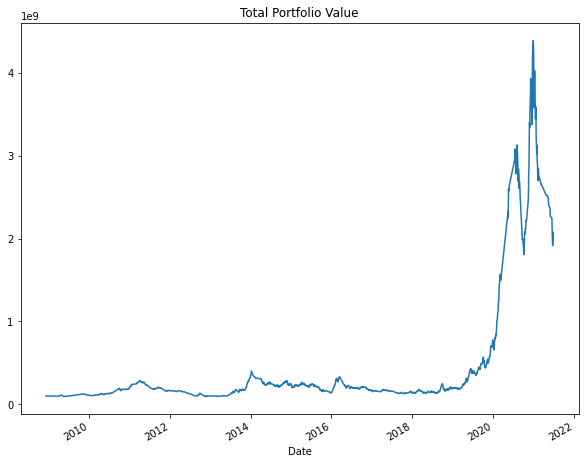

In [63]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

<AxesSubplot:xlabel='Date'>

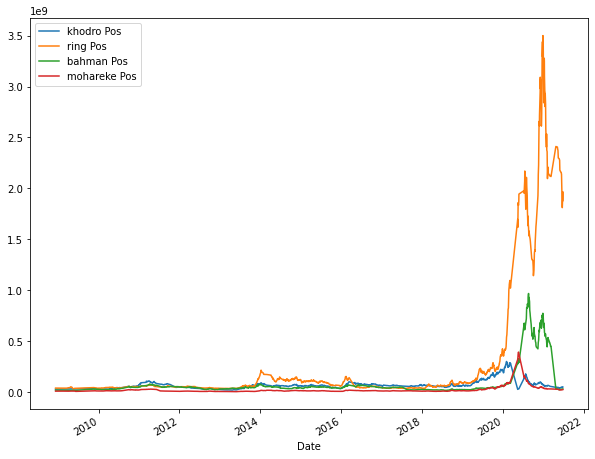

In [64]:
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(10,8), kind='line')

In [65]:
#Portfolio Statistics

In [66]:
#Daily Returns
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [68]:
#Cumulative Return
cum_ret = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1)
print('Our return: {} percent!'.format(cum_ret))

Our return: 1886.1430181215958 percent!


In [69]:
#Avg Daily Return
portfolio_val['Daily Return'].mean()

0.0019511553507818304

In [70]:
#Std Daily Return
portfolio_val['Daily Return'].std()

0.03151610967480344

<AxesSubplot:ylabel='Density'>

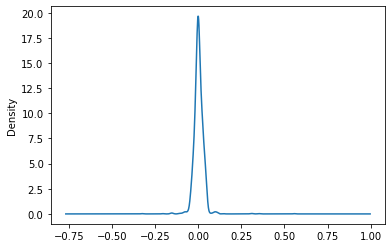

In [71]:
portfolio_val['Daily Return'].plot(kind='kde')

In [73]:
# Sharpe Ratio
# http://www.investopedia.com/terms/s/sharperatio
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [74]:
SR

0.06190977791722002

In [75]:
#Annualized Sharpe Ratio
ASR = (252**0.5) * SR

In [76]:
ASR

0.9827872565532151

<AxesSubplot:ylabel='Density'>

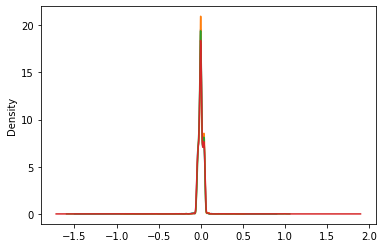

In [78]:
khodro['Close'].pct_change(1).plot(kind='kde')
ring['Close'].pct_change(1).plot(kind='kde')
bahman['Close'].pct_change(1).plot(kind='kde')
mohareke['Close'].pct_change(1).plot(kind='kde')

In [79]:
np.sqrt(252) * (np.mean(.001 - 0.0002) / .001)

12.699606293110037